In [1]:
##  Input -> Conv -> ReLU -> Pool -> Conv –> ReLU –> Pool -> FC - Output  

## 代码步骤
* 加载数据数据集
* 检查数据集的格式，维度
* 数据的可视化，抽查一下数据
* 数据预处理
* Input -> Conv -> ReLU -> Pool -> Conv –> ReLU –> Pool -> FC - Output  创建CNN模型
* 编译模型
* 训练模型
* 模型的评估
* 模型预测


## 01_加载数据集

In [21]:
# npz文件实际上是numpy数据的二进制压缩包 /mnist.npz 手写数字识别的二进制文件
import numpy as np
f = np.load('./mnist.npz')
X_train,y_train = f['x_train'],f['y_train']
X_test,y_test =f['x_test'],f['y_test']
f.close()

## 02_检查数据集的格式，维度

In [22]:
print("训练集的训练数据维度{}".format(X_train.shape))
print("训练集的结果标签维度{}".format(y_train.shape))
print("测试集的训练数据维度{}".format(X_test.shape))
print("测试集的结果标签维度{}".format(y_test.shape))

训练集的训练数据维度(60000, 28, 28)
训练集的结果标签维度(60000,)
测试集的训练数据维度(10000, 28, 28)
测试集的结果标签维度(10000,)


## 03_数据的可视化,抽查一下数据

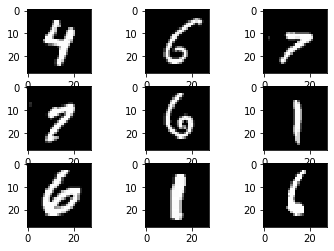

In [23]:
import matplotlib.pyplot as plt
plt.subplot(331)
random_index = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_index],cmap='gray')
plt.subplot(332)
random_index = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_index],cmap='gray')
plt.subplot(333)
random_index = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_index],cmap='gray')
plt.subplot(334)
random_index = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_index],cmap='gray')
plt.subplot(335)
random_index = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_index],cmap='gray')
plt.subplot(336)
random_index = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_index],cmap='gray')
plt.subplot(337)
random_index = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_index],cmap='gray')
plt.subplot(338)
random_index = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_index],cmap='gray')
plt.subplot(339)
random_index = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_index],cmap='gray')

## 04_数据预处理

In [24]:
## tf框架cnn网络处理图片的时候，一定要去指定图像的类型（灰度，彩色图）
X_train  = X_train.reshape(60000,28,28,1)
X_test  = X_test.reshape(10000,28,28,1)

## 数据归一化
X_train = X_train/255.0
X_test = X_test/255.0

print("训练集的训练数据维度{}".format(X_train.shape))
print("测试集的训练数据维度{}".format(X_test.shape))


训练集的训练数据维度(60000, 28, 28, 1)
测试集的训练数据维度(10000, 28, 28, 1)


In [25]:
## 结果标签独热编码
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [28]:
print("训练集的结果标签维度{}".format(y_train.shape))
print("测试集的结果标签维度{}".format(y_test.shape))


训练集的结果标签维度(60000, 10)
测试集的结果标签维度(10000, 10)


## 创建cnn的网络模型

Input -> Conv -> ReLU -> Pool -> Conv –> ReLU –> Pool -> FC - Output 创建CNN模型

* 输入（28，28，1）灰度图
* Conv （3，3） 16层 
* Relu
* maxpooling
* Conv （3，3） 32层 
* Relu
* Flatten
* Dense（10）
* softmax

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [30]:
model = Sequential()
# 第一层卷积，卷积核3x3, 特征提取器的数量16，激活函数relu
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
# 降采样，把图像的大小变成原来的1/4
model.add(MaxPooling2D(pool_size=(2, 2)))
# 第二层卷积
model.add(Conv2D(32,(3,3),activation='relu'))
# 降维打击，数据打平， 转换成特征向量
model.add(Flatten())
# 全连接层，隐藏层神经元数量是200
model.add(Dense(200,activation='relu'))
# 输出层
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               774600    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 781,410
Trainable params: 781,410
Non-trainable params: 0
__________________________________________________

## 模型的可视化


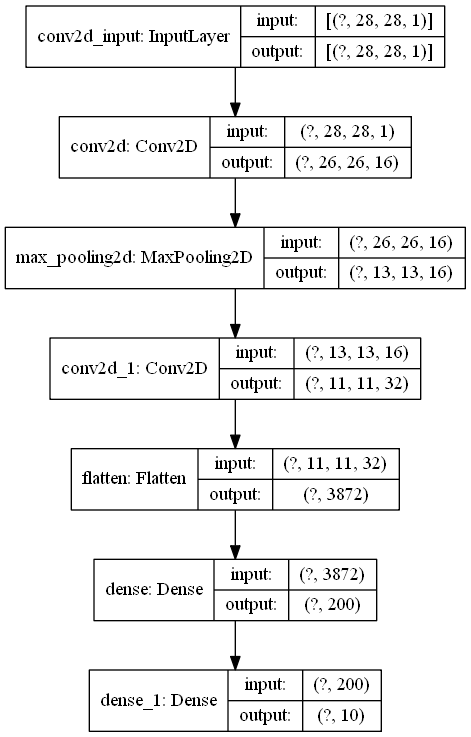

In [32]:
# graphviz 
# windows 安装我提供的软件，然后把安装路径的bin目录添加到环境变量
# C:\Program Files (x86)\Graphviz2.38\bin
# linux ： sudo apt-get install graphviz

tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)

## 模型编译

In [34]:
model.compile( optimizer='rmsprop',loss= 'categorical_crossentropy',metrics= ['accuracy', 'mse'])

## 模型训练

In [36]:
histroy = model.fit(X_train,y_train,batch_size=100,epochs=10,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 429us/sample - loss: 0.0455 - accuracy: 0.9860 - mse: 0.0022 - val_loss: 0.0331 - val_accuracy: 0.9895 - val_mse: 0.0016
Epoch 2/10
60000/60000 [==============================] - 26s 427us/sample - loss: 0.0297 - accuracy: 0.9905 - mse: 0.0014 - val_loss: 0.0329 - val_accuracy: 0.9890 - val_mse: 0.0017
Epoch 3/10
60000/60000 [==============================] - 27s 452us/sample - loss: 0.0207 - accuracy: 0.9935 - mse: 9.9723e-04 - val_loss: 0.0288 - val_accuracy: 0.9908 - val_mse: 0.0014
Epoch 4/10
60000/60000 [==============================] - 25s 409us/sample - loss: 0.0146 - accuracy: 0.9954 - mse: 6.9856e-04 - val_loss: 0.0320 - val_accuracy: 0.9909 - val_mse: 0.0015
Epoch 5/10
60000/60000 [==============================] - 24s 393us/sample - loss: 0.0110 - accuracy: 0.9966 - mse: 5.2714e-04 - val_loss: 0.0328 - val_accuracy: 0.9911 - val_mse: 0.0014
Epoch 6/10
60000/60000 

## 可视化图表的方式展现训练过程的数据变化

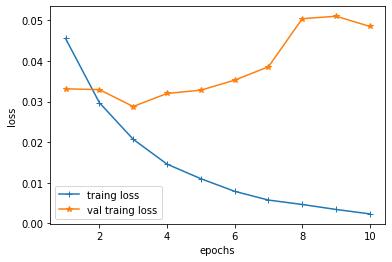

In [43]:
epochs = [1,2,3,4,5,6,7,8,9,10]
loss_value = histroy.history['loss']
val_loss_value = histroy.history['val_loss']

line1 = plt.plot(epochs,loss_value,label="traing loss")
line2 = plt.plot(epochs,val_loss_value,label="val traing loss")

plt.setp(line1,marker="+")
plt.setp(line2,marker="*")

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

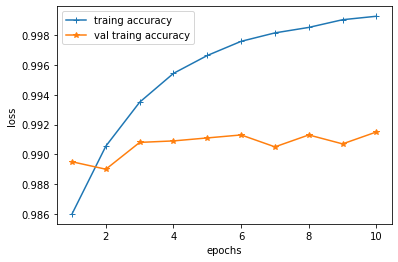

In [44]:
epochs = [1,2,3,4,5,6,7,8,9,10]
loss_value = histroy.history['accuracy']
val_loss_value = histroy.history['val_accuracy']

line1 = plt.plot(epochs,loss_value,label="traing accuracy")
line2 = plt.plot(epochs,val_loss_value,label="val traing accuracy")

plt.setp(line1,marker="+")
plt.setp(line2,marker="*")

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [45]:
## 保存模型
model.save('abc.h5')